## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preparation

In [2]:
data = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='population', ylabel='profit'>

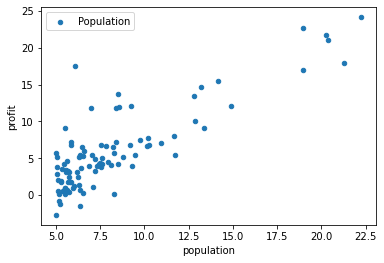

In [4]:
# scatter plot
data.plot.scatter('population', 'profit', label='Population')

#### Implement Algorithm from Scratch

In [5]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [42]:
# slice dataset
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [ ]:
# convert dataframe to nparray
# 1. df.values
# 2. df.as_matrix()
# 3. np.array(df)

In [43]:
X = X.values
y = y.values

In [13]:
X.shape

(97, 2)

In [14]:
y.shape

(97,)

In [15]:
# convert y to 2d 
y = y.reshape(97,1)
y.shape

(97, 1)

In [19]:
# loss function
def lossFunction(X, y, theta):
    #inner = np.power(((X * theta.T) - y), 2)
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [20]:
theta = np.zeros((2,1)) 

In [21]:
# initial loss
loss_init = lossFunction(X, y, theta)
print(loss_init)

32.072733877455676


In [28]:
# gradient desent algorithm
def gradientDescent(X, y, theta, iters):
    loss = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X)
        current_loss = lossFunction(X, y, theta)
        loss.append(current_loss)
        
        if i%100 == 0:
            print(current_loss)
        
    return theta, loss

In [29]:
# try out alpha and iterations
alpha = 0.02
iters = 2000
theta, loss = gradientDescent(X, y, theta, iters)

16.769642371667462
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.515548908598865
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414094
4.47801319061941
4.477477295755764
4.477217057705424
4.47709068246386
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791015
4.476974597934661
4.476972940603824


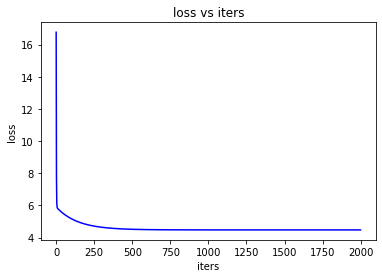

In [35]:
# plot loss vs iterations
fig, ax = plt.subplots()
ax.plot(np.arange(iters), loss, 'b')
ax.set(xlabel = 'iters',
       ylabel = 'loss',
      title = 'loss vs iters')
plt.show()

In [36]:
print(theta)

[[-3.8928815 ]
 [ 1.19274237]]


In [44]:
# final linear regression function
x = np.linspace(data.population.min(), data.population.max(), 100)
y_pred = theta[0,0] + theta[1,0] * x

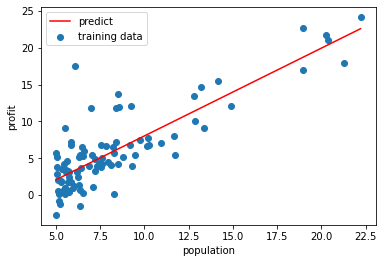

In [45]:
# plot training data and prediction
fig, ax = plt.subplots()
ax.scatter(X[:, 1], y, label = 'training data')
ax.plot(x, y_pred, 'r', label = 'predict')
ax.legend()
ax.set(xlabel = 'population',
       ylabel = 'profit')
plt.show()